E-bikes were introduced in 2020.08, so now we have three years' worth of data (thru 2023.07).

How have e-bikes changed the bike usage patterns in Chicago?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [120]:
dataDir = '/home/alp/Google Drive/Python/DataSets/Data_Divvy/CVS_archive/'

import glob
file_names = sorted(glob.glob(dataDir+'Divvy*.csv'))

# since i've worked with this data before, let's just import the cols I want, rather than loading them all and deleting them
cols = ['rideable_type','started_at','ended_at','start_station_id','end_station_id','start_lat','start_lng','end_lat','end_lng','member_casual']

data = pd.read_csv('/home/alp/Google Drive/Python/DataSets/Data_Divvy/CVS_archive/202307-divvy-tripdata.csv',
                    parse_dates = [2,3],usecols=cols)
# initialize DF with first month's data

#cycle through each year getting the data
year = 2020
for month in range(9,13):
    file = f"{dataDir}{year}{month:02d}-divvy-tripdata.csv"
    newData = pd.read_csv(file,parse_dates=[2,3],usecols=cols)
    data = pd.concat([data,newData])
    print(f'reading{file}')

for year in range(2021,2023):
    for month in range(1,13):
        file = f"{dataDir}{year}{month:02d}-divvy-tripdata.csv"
        newData = pd.read_csv(file,parse_dates=[2,3],usecols=cols)
        data = pd.concat([data,newData])
        print(f'reading{file}')

year = 2023
for month in range(1,8):
    file = f"{dataDir}{year}{month:02d}-divvy-tripdata.csv"
    newData = pd.read_csv(file,parse_dates=[2,3],usecols=cols)
    data = pd.concat([data,newData])
    print(f'reading{file}')

# add month and year cols to facilitate analysis
data['month'] = pd.DatetimeIndex(data['started_at']).month
data['year'] = pd.DatetimeIndex(data['started_at']).year

# divvy changes its terminology periodically; I think 'classic_bike' = 'docked_bike', so let's consolidate the terms
# this should be checked in the 2023 data
data['rideable_type'].replace(to_replace = 'docked_bike', value = 'classic_bike',inplace = True)



reading/home/alp/Google Drive/Python/DataSets/Data_Divvy/CVS_archive/202009-divvy-tripdata.csv
reading/home/alp/Google Drive/Python/DataSets/Data_Divvy/CVS_archive/202010-divvy-tripdata.csv
reading/home/alp/Google Drive/Python/DataSets/Data_Divvy/CVS_archive/202011-divvy-tripdata.csv
reading/home/alp/Google Drive/Python/DataSets/Data_Divvy/CVS_archive/202012-divvy-tripdata.csv
reading/home/alp/Google Drive/Python/DataSets/Data_Divvy/CVS_archive/202101-divvy-tripdata.csv
reading/home/alp/Google Drive/Python/DataSets/Data_Divvy/CVS_archive/202102-divvy-tripdata.csv
reading/home/alp/Google Drive/Python/DataSets/Data_Divvy/CVS_archive/202103-divvy-tripdata.csv
reading/home/alp/Google Drive/Python/DataSets/Data_Divvy/CVS_archive/202104-divvy-tripdata.csv


KeyboardInterrupt: 

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16356150 entries, 0 to 767649
Data columns (total 12 columns):
 #   Column            Dtype         
---  ------            -----         
 0   rideable_type     object        
 1   started_at        object        
 2   ended_at          datetime64[ns]
 3   start_station_id  object        
 4   end_station_id    object        
 5   start_lat         float64       
 6   start_lng         float64       
 7   end_lat           float64       
 8   end_lng           float64       
 9   member_casual     object        
 10  month             int64         
 11  year              int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 1.6+ GB


In [67]:
# not sure why it's not parsing "started_at" correctly, but it's an easy fix
data['started_at'] = pd.to_datetime(data['started_at'],format = '%Y-%m-%d %H:%M:%S')

In [7]:
data.head()

,rideable_type,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,year
0,classic_bike,2020-08-20 18:08:14,2020-08-20 18:17:51,329,141.0,41.932588,-87.636427,41.915689,-87.634600,member,8,2020
1,electric_bike,2020-08-27 18:46:04,2020-08-27 19:54:51,168,168.0,41.864379,-87.623681,41.864221,-87.623439,casual,8,2020
2,electric_bike,2020-08-26 19:44:14,2020-08-26 21:53:07,195,44.0,41.884641,-87.619549,41.884971,-87.627574,casual,8,2020
3,electric_bike,2020-08-27 12:05:41,2020-08-27 12:53:45,81,47.0,41.884093,-87.629639,41.889583,-87.627540,casual,8,2020
4,electric_bike,2020-08-27 16:49:02,2020-08-27 16:59:49,658,658.0,41.902989,-87.683767,41.903002,-87.683844,casual,8,2020


In [5]:
# what percent of bikes start NOT at a station?
len(data[data['start_station_id'].isna()]) / len(data)

0.12836101405281805

In [68]:
# so about 13% of rides don't start at a station.
# does this vary by year?
for year in range(2020,2024):
    filter = data[data['year'] == year]
    print(f"pct of bikes starting NOT at a station in {year}: {len( noStation[noStation['year'] == year]) / len(filter)}")
                                                                   
                                                                   
# data[ (data['start_station_id'].isna()) &  filter]) / len(filter)}")


pct of bikes starting NOT at a station in 2020: 0.049156160331862216
pct of bikes starting NOT at a station in 2021: 0.12346706373100715
pct of bikes starting NOT at a station in 2022: 0.14698405019163802
pct of bikes starting NOT at a station in 2023: 0.15214547692939034


In [28]:
noStation[noStation['year'] == 2020][['start_lat','start_lng']].mean()

start_lat    41.883926
start_lng   -87.654304
dtype: float64

In [33]:
for year in range(2020,2024):
    print(f"{year} \n{noStation[noStation['year'] == year][['start_lat','start_lng']].mean()}")

2020 
start_lat    41.883926
start_lng   -87.654304
dtype: float64
2021 
start_lat    41.887605
start_lng   -87.659936
dtype: float64
2022 
start_lat    41.901407
start_lng   -87.659374
dtype: float64
2023 
start_lat    41.909008
start_lng   -87.655135
dtype: float64


In [35]:
noStation[noStation['year'] == 2020][['start_lat','start_lng']].value_counts()[0:8]

start_lat  start_lng
41.80      -87.59       4181
41.79      -87.60       2807
41.80      -87.60       2095
41.79      -87.59       1882
41.89      -87.63       1863
41.92      -87.69       1512
           -87.70       1465
41.90      -87.63       1383
dtype: int64

In [36]:
noStation[noStation['year'] == 2021][['start_lat','start_lng']].value_counts()[0:8]

start_lat  start_lng
41.79      -87.60       34440
41.80      -87.59       21968
           -87.60       13347
41.89      -87.63       13164
41.79      -87.59       11088
41.92      -87.70       10184
41.90      -87.69        9987
41.92      -87.69        9690
dtype: int64

In [37]:
noStation[noStation['year'] == 2022][['start_lat','start_lng']].value_counts()[0:8]

start_lat  start_lng
41.79      -87.60       30481
41.89      -87.63       19226
41.91      -87.63       16414
41.90      -87.63       15316
41.94      -87.65       15123
41.88      -87.63       14996
41.80      -87.59       14360
41.93      -87.64       13664
dtype: int64

In [39]:
noStation[noStation['year'] == 2022][['start_lat','start_lng']].value_counts()[0:8].sum() / len(noStation[noStation['year'] == 2022])

0.167550152209194

As I have previously observed, the bikes not starting at a station that lack lat/lng data seem to use (41,79,-87.60) as a default value. The top ten lat/lng values account for 17% of all the no-station bikes.

This is a significant limitation on the ability to analyze how the stationless bikes are used.

In [121]:
data.memory_usage()

Index               22341856
rideable_type       22341856
started_at          22341856
ended_at            22341856
start_station_id    22341856
end_station_id      22341856
start_lat           22341856
start_lng           22341856
end_lat             22341856
end_lng             22341856
member_casual       22341856
dtype: int64

In [12]:
f"{data.memory_usage().sum():,}"

'1,701,039,600'

In [15]:
data.drop(['start_station_id','end_station_id'],axis=1,inplace=True)
f"{data.memory_usage().sum():,}"

'1,439,341,200'

In the 36 months since e-bikes were introduced, there have been 16.3 million bike rides in chicago.

How have total N rides shifted over time?

<AxesSubplot: >

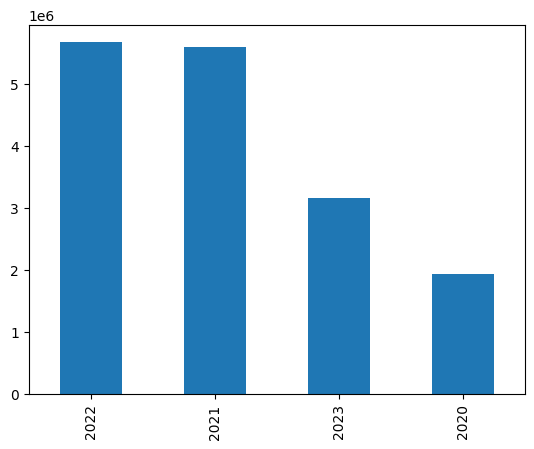

In [4]:
data['year'].value_counts().plot(kind='bar')

<AxesSubplot: >

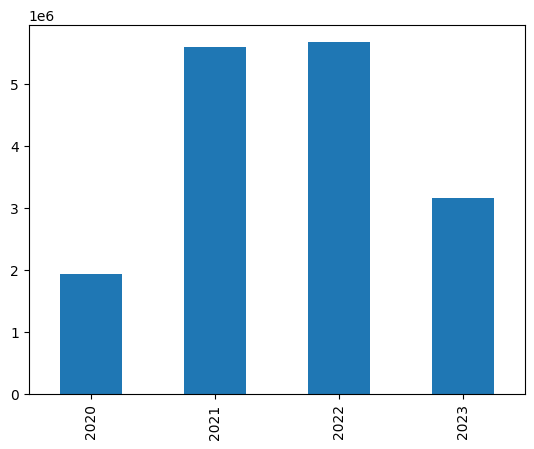

In [5]:
# sort by index, rather than total N values
data['year'].value_counts().sort_index().plot(kind='bar')

Since we have incomplete data in 2020 and 2023, we cannot compare year to year changes.

Text(0.5, 1.0, 'Number of bike rides per month')

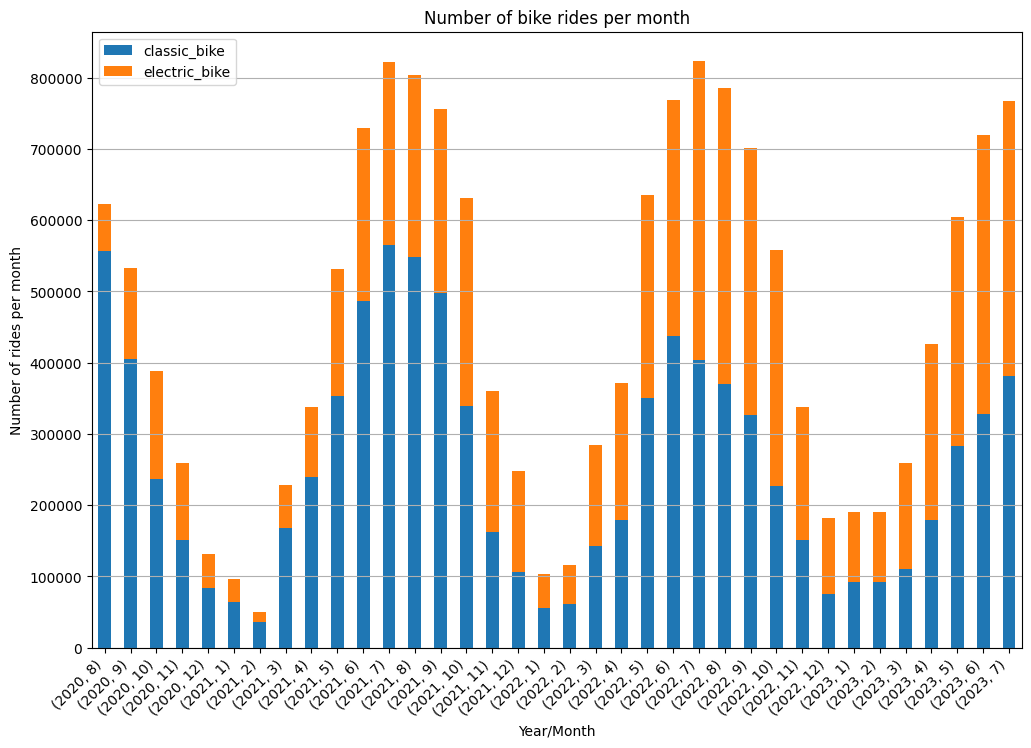

In [6]:
# first calculate the total number of different types of bike rides taken since e-bikes introduced
plt.rcParams['figure.figsize']=(12,8)

graphData = pd.crosstab([data.rideable_type],[data.year,data.month],
                        values=data.started_at,aggfunc = 'count').T
graphData.plot(kind='bar',stacked = True).legend(loc = 'upper left')
plt.xticks(rotation=45,horizontalalignment = 'right')
plt.xlabel('Year/Month')
#plt.yticks(np.arange(0,1.1,.25))
plt.ylabel('Number of rides per month')
plt.grid(axis='y')
plt.title("Number of bike rides per month")

This graph shows a very clear (and unsurprings) seasonal pattern to bike rides. In Jan/feb, ridership is very low; in Dec/Mar it's low; and the rest of the year it is robust.

What percent of these rides is being done on ebikes?

Text(0.5, 1.0, 'Change in type of bikes ridden per month')

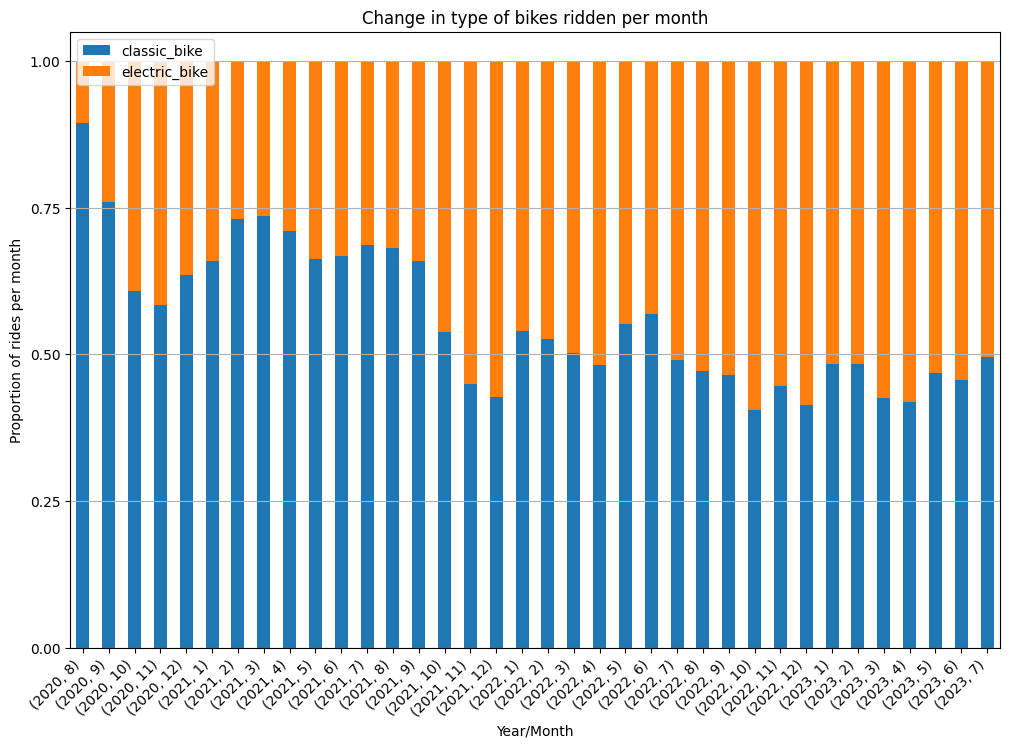

In [32]:
# let's print this in a normalized graph
graphData = pd.crosstab([data.rideable_type],[data.year,data.month],
                        values=data.started_at,aggfunc = 'count', normalize = 'columns').T
graphData.plot(kind='bar',stacked = True).legend(loc = 'upper left')
plt.xticks(rotation=45,horizontalalignment = 'right')
plt.xlabel('Year/Month')
plt.yticks(np.arange(0,1.1,.25))
plt.ylabel('Proportion of rides per month')
plt.grid(axis='y')
plt.title("Change in type of bikes ridden per month")

It seems like the percent of E-bike got close to 50% by Jan 2022 and has hovered there ever since.

Let's collapse this into the percent of e-bikes per year -- even if we can't count the total N rides, if normalize the count of classic vs ebikes, we can tell what pct of rides was on each type.

Text(0.5, 1.0, 'Change in type of bikes ridden per month')

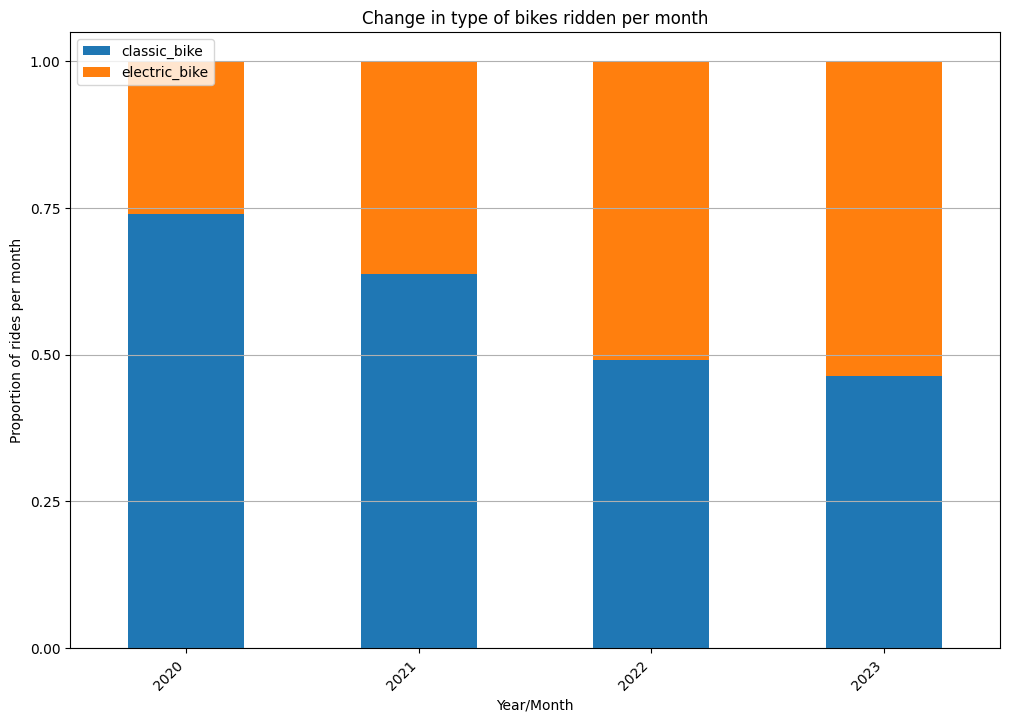

In [8]:
# let's print this in a normalized graph
graphData = pd.crosstab([data.rideable_type],[data.year],
                        values=data.started_at,aggfunc = 'count', normalize = 'columns').T
graphData.plot(kind='bar',stacked = True).legend(loc = 'upper left')
plt.xticks(rotation=45,horizontalalignment = 'right')
plt.xlabel('Year/Month')
plt.yticks(np.arange(0,1.1,.25))
plt.ylabel('Proportion of rides per month')
plt.grid(axis='y')
plt.title("Change in type of bikes ridden per month")

This shows what the above graph indicated more clearly: e-bikes got to about 50% in 2022 and a few percentage points more in 2023.

Have e-bikes changed the membership types of the rides?

Text(0.5, 1.0, 'Change in type of bikes ridden per month')

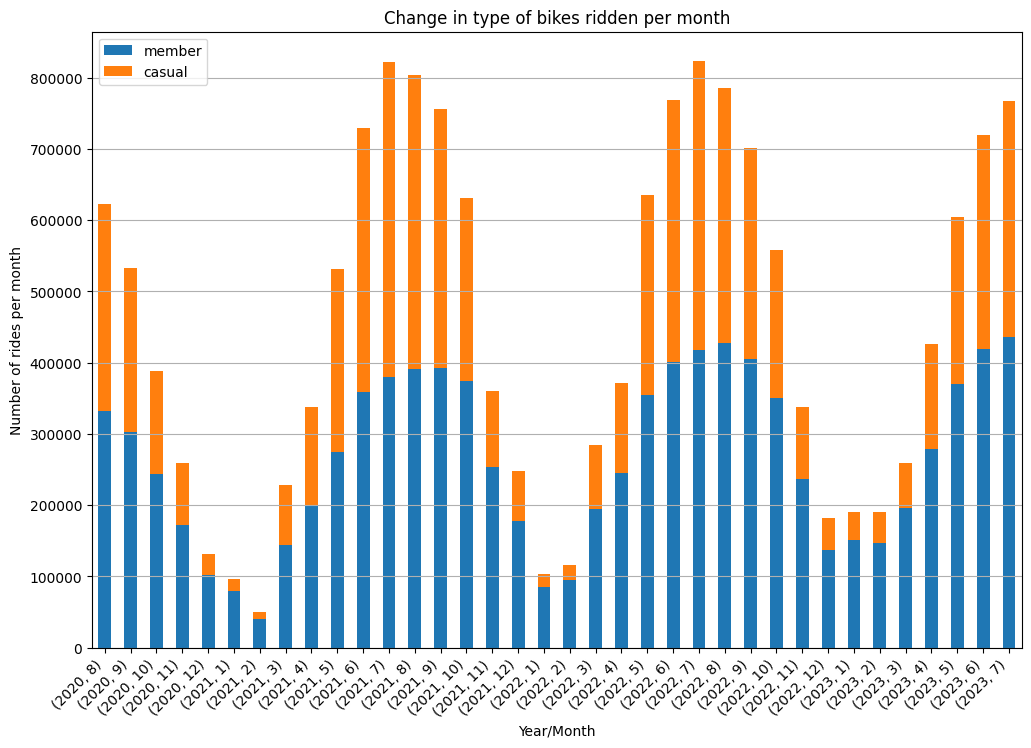

In [34]:
# did the introduction of e-bikes change the number of people who joined Divvy as members?
graphData = pd.crosstab([data.member_casual],[data.year,data.month],
                        values=data.started_at,aggfunc = 'count').T
                        
# the crosstab puts cols in alpha order; let's change this so 'member' is on bottom
graphData = graphData[['member','casual']]

graphData.plot(kind='bar',stacked = True).legend(loc = 'upper left')
plt.xticks(rotation=45,horizontalalignment = 'right')
plt.xlabel('Year/Month')
#plt.yticks(np.arange(0,1.1,.25))
plt.ylabel('Number of rides per month')
plt.grid(axis='y')
plt.title("Change in type of bikes ridden per month")

Text(0.5, 1.0, 'Change in type of bikes ridden per month')

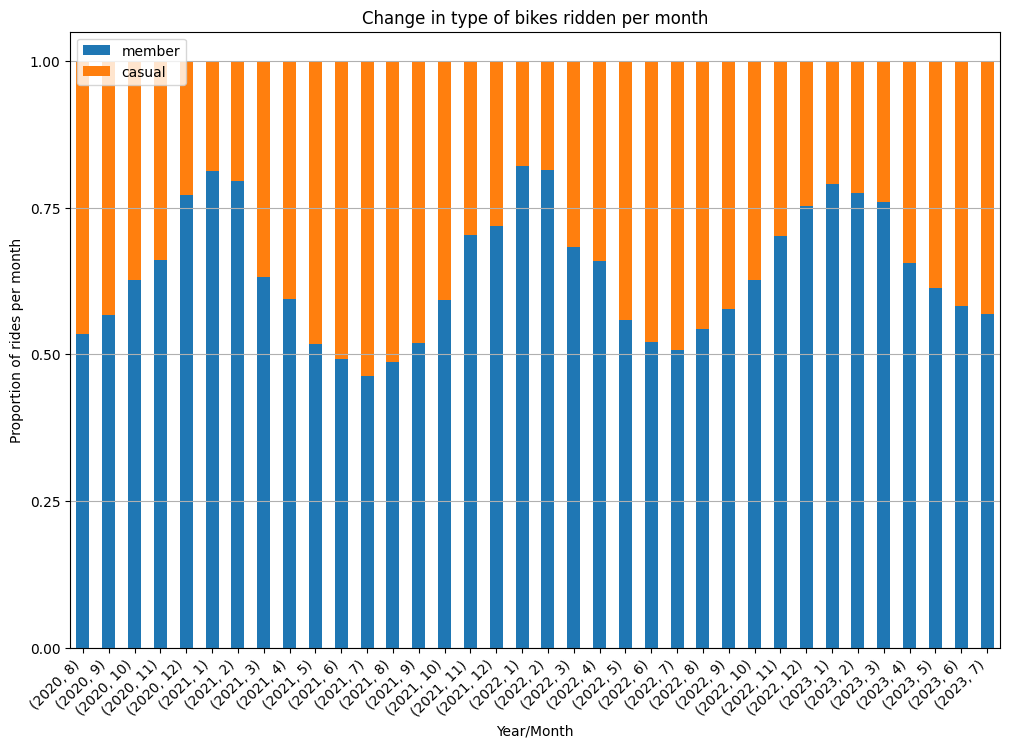

In [35]:
# did the introduction of e-bikes change the number of people who joined Divvy as members?
graphData = pd.crosstab([data.member_casual],[data.year,data.month],
                        values=data.started_at,aggfunc = 'count', normalize = 'columns').T

# the crosstab puts cols in alpha order; let's change this so 'member' is on bottom
graphData = graphData[['member','casual']]

graphData.plot(kind='bar',stacked = True).legend(loc = 'upper left')
plt.xticks(rotation=45,horizontalalignment = 'right')
plt.xlabel('Year/Month')
plt.yticks(np.arange(0,1.1,.25))
plt.ylabel('Proportion of rides per month')
plt.grid(axis='y')
plt.title("Change in type of bikes ridden per month")

During the summer months -- when the weather is better and we might expect more casual riders and tourists -- the percent of "casual" riders goes to about 50% of all rides. But there is a fairly stead base of "members" who may be depending on Divvy as their primary transportation.

Text(0.5, 1.0, 'Change in type of bikes ridden per month')

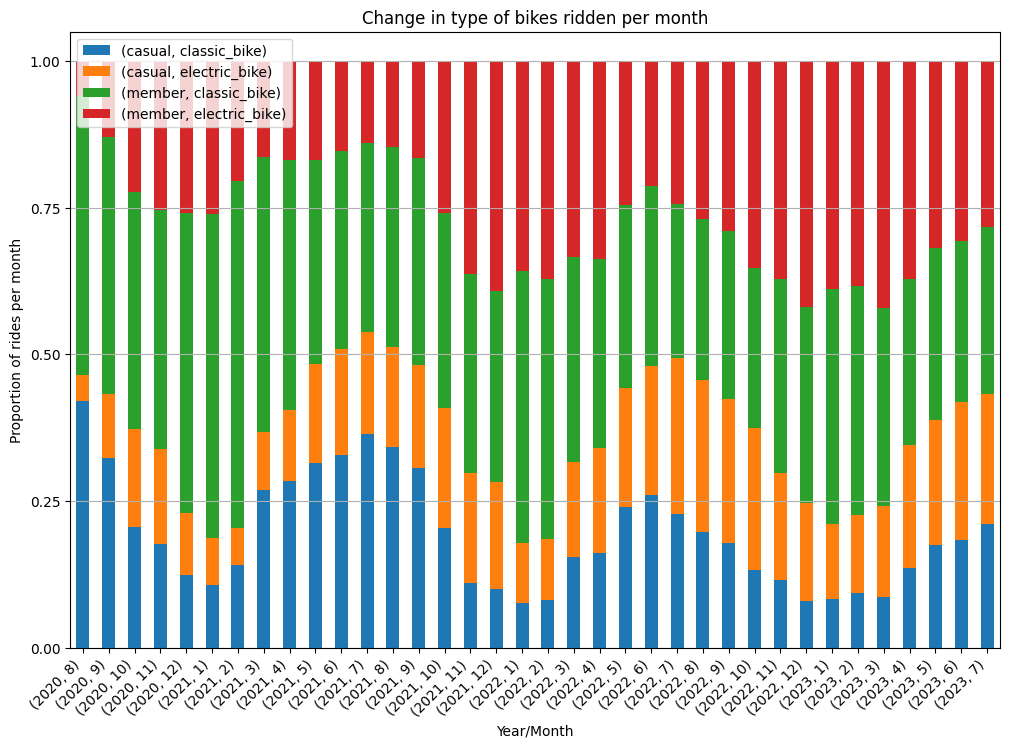

In [9]:
# did the introduction of e-bikes change the number of people who joined Divvy as members?
graphData = pd.crosstab([data.member_casual,data.rideable_type],[data.year,data.month],
                        values=data.started_at,aggfunc = 'count', normalize = 'columns').T

# the crosstab puts cols in alpha order; let's change this so 'member' is on bottom
#graphData = graphData[['member','casual']]

graphData.plot(kind='bar',stacked = True).legend(loc = 'upper left')
plt.xticks(rotation=45,horizontalalignment = 'right')
plt.xlabel('Year/Month')
plt.yticks(np.arange(0,1.1,.25))
plt.ylabel('Proportion of rides per month')
plt.grid(axis='y')
plt.title("Change in type of bikes ridden per month")

Text(0.5, 1.0, 'Change in type of bikes ridden per month')

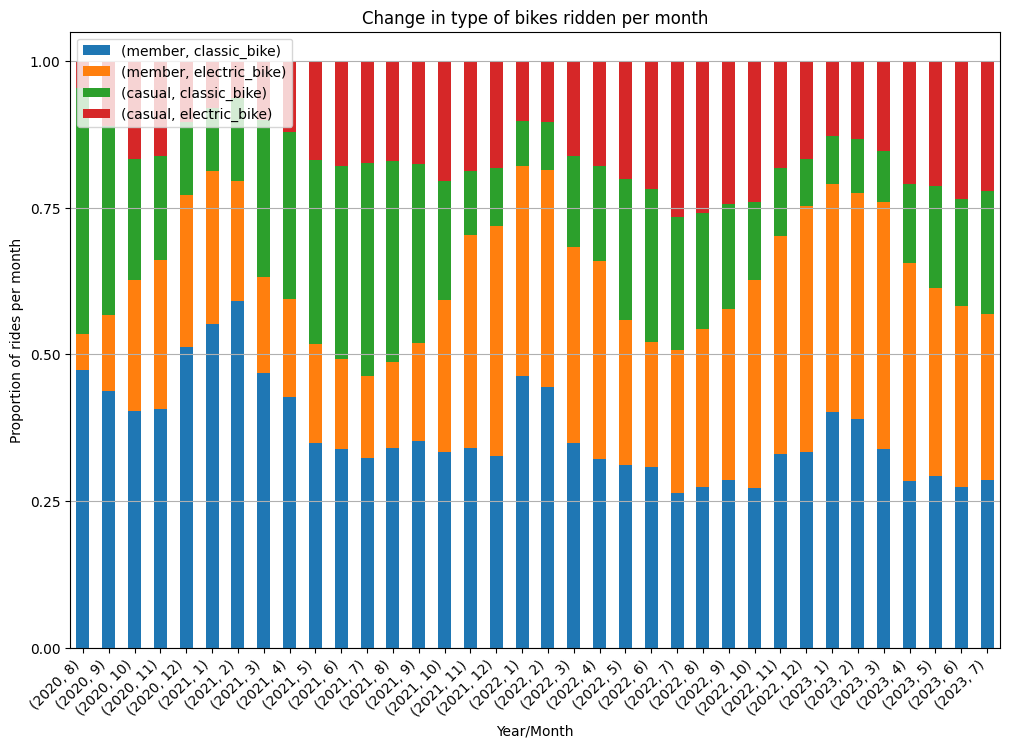

In [12]:
graphData = graphData[['member','casual']]
graphData.plot(kind='bar',stacked = True).legend(loc = 'upper left')
plt.xticks(rotation=45,horizontalalignment = 'right')
plt.xlabel('Year/Month')
plt.yticks(np.arange(0,1.1,.25))
plt.ylabel('Proportion of rides per month')
plt.grid(axis='y')
plt.title("Change in type of bikes ridden per month")

Let's try to draw a heatmap with time for the busiest day of the year to see how bike usage shifts over a 24 hour period.

In [119]:
data['doy'] = pd.DatetimeIndex(data['started_at']).dayofyear

In [80]:
data[data['year']==2021].groupby('doy').count().sort_values(by = ['rideable_type'])

,rideable_type,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,year
doy,,,,,,,,,,,,
47,284,284,284,254,223,284,284,277,277,284,284,284
46,350,350,350,340,315,350,350,342,342,350,350,350
31,486,486,486,405,381,486,486,483,483,486,486,486
45,498,498,498,487,464,498,498,484,484,498,498,498
38,569,569,569,547,527,569,569,562,562,569,569,569
...,...,...,...,...,...,...,...,...,...,...,...,...
212,35739,35739,35739,32482,32337,35739,35739,35706,35706,35739,35739,35739
170,36328,36328,36328,32971,32732,36328,36328,36288,36288,36328,36328,36328
156,36697,36697,36697,32471,32097,36697,36697,36652,36652,36697,36697,36697


So the busiest day in our DB is 2021.226 = Sat, Aug 14, 2021. So let's create a DF with the data from that one day. We will then try to plot that by hour of the day...

In [107]:
subset = data[(data['year'] == 2021) & (data['doy'] == 226) ]
subset.head()

,rideable_type,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,year,doy
45,electric_bike,2021-08-14 11:10:25,2021-08-14 11:39:33,KA1503000043,NaN,41.889077,-87.638426,41.87,-87.62,member,8,2021,226
284,electric_bike,2021-08-14 19:46:06,2021-08-14 20:02:45,NaN,NaN,41.730000,-87.650000,41.77,-87.65,casual,8,2021,226
286,electric_bike,2021-08-14 22:28:36,2021-08-14 22:49:23,NaN,NaN,41.930000,-87.750000,41.90,-87.72,casual,8,2021,226
393,electric_bike,2021-08-14 16:36:07,2021-08-14 16:37:15,NaN,NaN,41.930000,-87.640000,41.93,-87.64,casual,8,2021,226
394,electric_bike,2021-08-14 18:09:49,2021-08-14 18:31:24,NaN,NaN,41.730000,-87.650000,41.74,-87.65,casual,8,2021,226


In [112]:
subset['hourOfDay'] = pd.DatetimeIndex(subset['started_at']).hour


/tmp/ipykernel_17426/1149868480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['hourOfDay'] = pd.DatetimeIndex(subset['started_at']).hour


In [110]:
subset.head()

,rideable_type,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,year,doy,time
45,electric_bike,2021-08-14 11:10:25,2021-08-14 11:39:33,KA1503000043,NaN,41.889077,-87.638426,41.87,-87.62,member,8,2021,226,11:10
284,electric_bike,2021-08-14 19:46:06,2021-08-14 20:02:45,NaN,NaN,41.730000,-87.650000,41.77,-87.65,casual,8,2021,226,19:46
286,electric_bike,2021-08-14 22:28:36,2021-08-14 22:49:23,NaN,NaN,41.930000,-87.750000,41.90,-87.72,casual,8,2021,226,22:28
393,electric_bike,2021-08-14 16:36:07,2021-08-14 16:37:15,NaN,NaN,41.930000,-87.640000,41.93,-87.64,casual,8,2021,226,16:36
394,electric_bike,2021-08-14 18:09:49,2021-08-14 18:31:24,NaN,NaN,41.730000,-87.650000,41.74,-87.65,casual,8,2021,226,18:09


In [116]:
import folium

m = folium.Map(location=[subset['start_lat'].mean(),subset['start_lng'].mean()], 
               zoom_start=11,
               tiles='OpenStreetMap')
# https://stackoverflow.com/questions/64325958/heatmapwithtime-plugin-in-folium

from folium.plugins import HeatMapWithTime

from collections import defaultdict, OrderedDict

mapData = defaultdict(list) # tell defaultdict() that when new key is encountered to create
                            # a key with a value of a blank list
for row in subset.itertuples():
    mapData[row.hourOfDay].append([row.start_lat,row.start_lng])
    # iterate over the subset DF, returning each item with it's column name:
    # Pandas(Index = 45, starte_at = '2021-08-14 11:10:25', etc.)
    # this allows us to access the items with the row.col_name syntax

mapData = OrderedDict(sorted(mapData.items(), key = lambda t: t[0]))
    # normally dicts are unordered
    # an OrderedDict remembers the order in which the keys were inserted
    # so this sorts the dictionary based on the first column (which is the time value)

hm = HeatMapWithTime(data = list(mapData.values()),
                     index = list(mapData.keys()),
                     radius = 10,
                     min_speed=1,
                     speed_step=1,
                     auto_play= True)
hm.add_to(m)

m

This heatmap is hard to read, mostly because there is too much data. What happens if we try to map it by 1 minute increments?

In [117]:
subset.loc[:,'time'] = subset['started_at'].dt.strftime("%H:%M")


/tmp/ipykernel_17426/2469616059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:,'time'] = subset['started_at'].dt.strftime("%H:%M")


In [118]:
m = folium.Map(location=[subset['start_lat'].mean(),subset['start_lng'].mean()], 
               zoom_start=11, 
               tiles='OpenStreetMap')
# https://stackoverflow.com/questions/64325958/heatmapwithtime-plugin-in-folium

mapData = defaultdict(list)
for row in subset.itertuples():
    mapData[row.time].append([row.start_lat,row.start_lng])

mapData = OrderedDict(sorted(mapData.items(), key = lambda t: t[0]))

hm = HeatMapWithTime(data = list(mapData.values()),
                     index = list(mapData.keys()),
                     radius = 10,
                     min_speed=1,
                     speed_step=1,
                     auto_play= True)
hm.add_to(m)

m

In [47]:
data[data['year']==2023].groupby('doy').count().sort_values(by = ['rideable_type'])

,rideable_type,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,year
doy,,,,,,,,,,,,
29,2418,2418,2418,2046,2040,2418,2418,2415,2415,2418,2418,2418
28,2519,2519,2519,2099,2070,2519,2519,2518,2518,2519,2519,2519
22,3374,3374,3374,2824,2780,3374,3374,3371,3371,3374,3374,3374
34,3491,3491,3491,2981,2937,3491,3491,3490,3490,3491,3491,3491
53,3520,3520,3520,3012,2969,3520,3520,3520,3520,3520,3520,3520
...,...,...,...,...,...,...,...,...,...,...,...,...
196,30109,30109,30109,24825,24633,30109,30109,30074,30074,30109,30109,30109
154,31794,31794,31794,26579,26280,31794,31794,31742,31742,31794,31794,31794
210,31960,31960,31960,26764,26564,31960,31960,31893,31893,31960,31960,31960


Divvy changed it's pricing structure from 2022 to 2023. Let's draw a map that counts the number of rides that start in any particular police beat (that's the smallest geographic )

In [16]:
import geopandas as gpd

tracts = gpd.read_file('https://data.cityofchicago.org/api/geospatial/5jrd-6zik?method=export&format=GeoJSON')
tracts.sample(3)

,statefp10,name10,commarea_n,namelsad10,commarea,geoid10,notes,tractce10,countyfp10,geometry
454,17,3812,38,Census Tract 3812,38,17031381200,,381200,031,"MULTIPOLYGON (((-87.61638 41.81120, -87.61587 ..."
754,17,1404,14,Census Tract 1404,14,17031140400,,140400,031,"MULTIPOLYGON (((-87.72803 41.96836, -87.72803 ..."
748,17,706,7,Census Tract 706,7,17031070600,,070600,031,"MULTIPOLYGON (((-87.66350 41.93067, -87.66349 ..."


geoid10
* state (IL = 17)
* county (cook = 031)
* name10: 4 digits + . + 2 digits --> if last 2 missing, padded with zeros.

Looks like we can drop everyting except geoid10 and geometry

In [17]:
tracts = tracts[['geoid10','geometry']]
tracts.head()

,geoid10,geometry
0,17031842400,"MULTIPOLYGON (((-87.62405 41.73022, -87.62405 ..."
1,17031840300,"MULTIPOLYGON (((-87.68608 41.82296, -87.68607 ..."
2,17031841100,"MULTIPOLYGON (((-87.62935 41.85280, -87.62934 ..."
3,17031841200,"MULTIPOLYGON (((-87.68813 41.85569, -87.68816 ..."
4,17031839000,"MULTIPOLYGON (((-87.63312 41.87449, -87.63306 ..."


Let's add a point geometry to the divvy data based on  start_lat / start_lng.
Then we can add the geoid10 data to the divvy table, count things based on that, then map the counts.

In [18]:
data['geometry'] = gpd.points_from_xy(data.start_lng , data.start_lat, crs="EPSG:4326")


In [19]:
dataGeom = gpd.GeoDataFrame(data = data, geometry = 'geometry')

In [20]:
#add tract number to dataGeom 

dataGeomTracts = gpd.sjoin(left_df=dataGeom,right_df=tracts,how='left')
dataGeomTracts.head(5)

: 

: 